<a href="https://colab.research.google.com/github/HelloWorldOvO/Colab_store/blob/main/Titanic_%E8%A7%80%E5%AF%9F_%E8%A8%93%E7%B7%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

參考 https://cloud.tencent.com/developer/article/2124799

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/dataset/Titanic/")

Mounted at /content/drive


In [ ]:
!apt-get install -y fonts-wqy-zenhei

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-wqy-zenhei
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 7,472 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-wqy-zenhei all 0.9.45-8 [7,472 kB]
Fetched 7,472 kB in 1s (5,252 kB/s)
Selecting previously unselected package fonts-wqy-zenhei.
(Reading database ... 120875 files and directories currently installed.)
Preparing to unpack .../fonts-wqy-zenhei_0.9.45-8_all.deb ...
Unpacking fonts-wqy-zenhei (0.9.45-8) ...
Setting up fonts-wqy-zenhei (0.9.45-8) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
type(data)
print(data.shape)
print(data.info())
print(data.describe())

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842 

## 單一特徵觀察

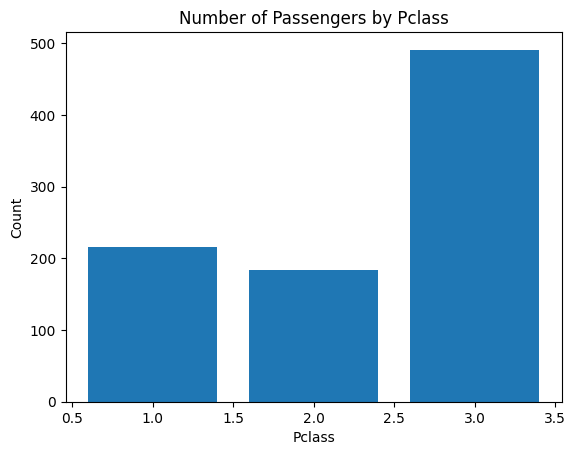

In [ ]:
pclass_count = data['Pclass'].value_counts() # 找出某一個特徵的全部值出現的次數，可以適用於所有非連續且會重複出現的特徵
plt.bar(pclass_count.index, pclass_count.values)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Number of Passengers by Pclass')
plt.show()

## 兩個特徵關係

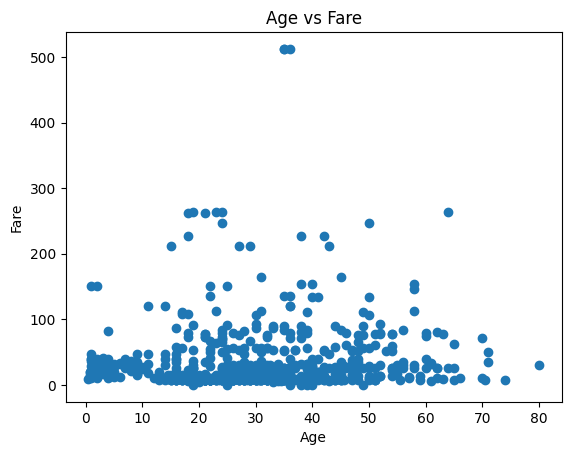

In [ ]:
plt.scatter(data['Age'], data['Fare']) # 散點圖 適用於兩個數執行資料
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()

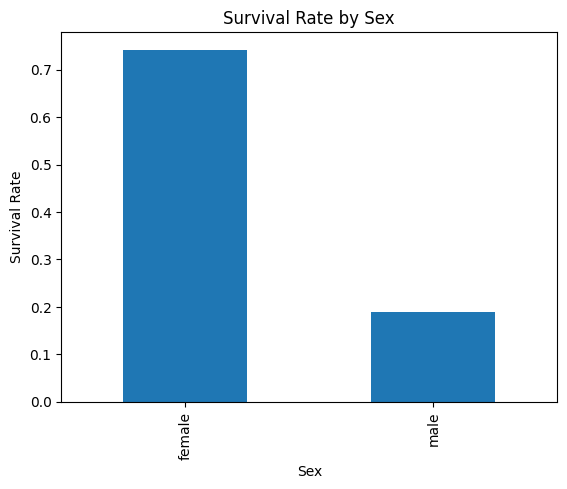

In [ ]:
# 計算每個性別的生存率
survival_rate = data.groupby('Sex')['Survived'].mean()

# 畫柱狀圖
survival_rate.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.show()

In [ ]:
bins = [0, 18, 60, 100]  # 這個列表定義了三個年齡段：0-18, 19-35, 36-100
labels = ['0-18', '19-60', '61-100']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [ ]:
survival_rate = data.groupby(['AgeGroup', 'Sex'])['Survived'].mean()

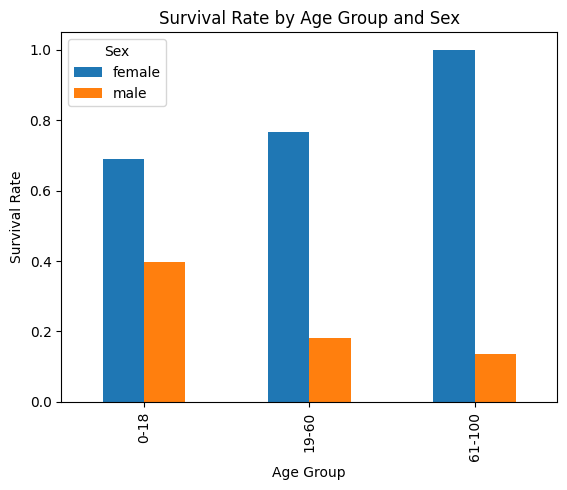

In [ ]:
survival_rate.unstack().plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group and Sex')
plt.show()


In [ ]:
# 計算每個特徵有多少個 NaN 值
nan_count = data.isna().sum()

# 打印結果
print(nan_count)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
# 創建 LabelEncoder 對象
encoder = LabelEncoder()

# 處理缺失值
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.dropna(subset=['Embarked'], inplace=True)

# 進行編碼並保存到新的列
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])

In [ ]:
x = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

# 首先，將數據分成訓練集和測試集（85% 和 15%）
X_temp, X_test, y_temp, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# 然後，從上一步的訓練集中分出訓練集和驗證集（82% 和 18%）
# 注意：0.18 * 0.85 ≈ 0.15，這樣就可以確保驗證集約占原數據的 15%
X_train, X_validation, y_train, y_validation = train_test_split(X_temp, y_temp, test_size=0.18, random_state=42)

# 現在，X_train, X_validation, X_test, y_train, y_validation, y_test 都已經準備好了

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping

# 建立模型
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],)))

# 編譯模型
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 早期停止設定
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# 訓練模型
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_validation, y_validation),
                    callbacks=[early_stop])


In [ ]:
# 評估模型在測試集上的性能
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

5/5 [==============================] - 0s 5ms/step - loss: 0.5325 - accuracy: 0.7537
Test Loss:  0.5324862003326416
Test Accuracy:  0.753731369972229
